In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
title = pd.read_csv('Movie_Id_Titles.csv')
title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
df = pd.read_csv('u.tsv', delimiter = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
df = df.merge(title, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
df.groupby('title')['rating'].mean().sort_values(ascending = False)[:30]

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [6]:
df.groupby('title')['rating'].count().sort_values(ascending = False)[:5]

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [7]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [8]:
rating['num of rating'] = pd.DataFrame(df.groupby('title')['rating'].count())
rating.head()

,rating,num of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


(array([520., 171., 122., 103.,  71.,  81.,  57.,  58.,  45.,  38.,  39.,
         25.,  26.,  22.,  25.,  28.,  14.,  16.,  14.,  15.,  24.,  17.,
          7.,   9.,  11.,   6.,  12.,   7.,   6.,   7.,   9.,   4.,   3.,
          6.,   2.,  11.,   2.,   3.,   2.,   2.,   1.,   3.,   0.,   1.,
          1.,   3.,   2.,   1.,   0.,   1.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,   2.,   1.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([  1.        ,   9.32857143,  17.65714286,  25.98571429,
         34.31428571,  42.64285714,  50.97142857,  59.3       ,
         67.62857143,  75.95714286,  84.28571429,  92.61428571,
        100.94285714, 109.27142857, 117.6       , 125.92857143,
        134.25714286, 142.58571429, 150.91428571, 159.24285714,
        167.57142857, 175.9       , 184.22857143, 192.55714286,
        200.88571429, 209.21428571, 217.54285714, 225.87142857,
        234.2       , 242.52857143, 250.85714286, 259.18571429,
        26

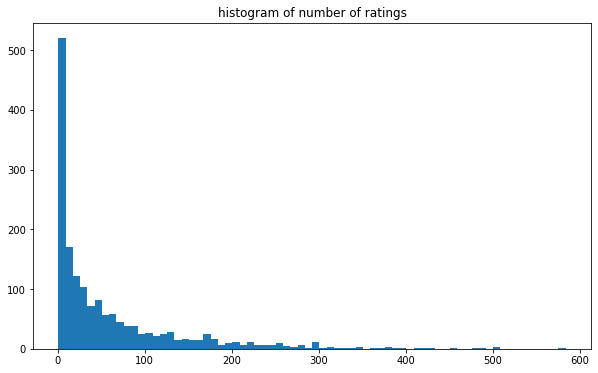

In [9]:
plt.figure(figsize = (10, 6))
plt.title('histogram of number of ratings')
plt.hist(rating['num of rating'], bins = 70)

(array([ 69.,   0.,   1.,   0.,   2.,   4.,   0.,   1.,  11.,   0.,   4.,
          7.,   4.,   3.,   9.,   7.,   6.,  52.,   3.,   7.,  19.,  26.,
         15.,  17.,  34.,  20.,  45.,  21.,  27.,  43.,  45.,  38.,  36.,
         32.,  12., 127.,  40.,  63.,  46.,  45.,  57.,  32.,  53.,  59.,
         42.,  49.,  52.,  36.,  45.,  46.,  34.,  35.,  64.,  24.,  27.,
         14.,  15.,  11.,   5.,   2.,   5.,   5.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,  10.]),
 array([1.        , 1.05714286, 1.11428571, 1.17142857, 1.22857143,
        1.28571429, 1.34285714, 1.4       , 1.45714286, 1.51428571,
        1.57142857, 1.62857143, 1.68571429, 1.74285714, 1.8       ,
        1.85714286, 1.91428571, 1.97142857, 2.02857143, 2.08571429,
        2.14285714, 2.2       , 2.25714286, 2.31428571, 2.37142857,
        2.42857143, 2.48571429, 2.54285714, 2.6       , 2.65714286,
        2.71428571, 2.77142857, 2.82857143, 2.88571429, 2.94285714,
        3.        , 3.05714286, 3.11428571, 3.

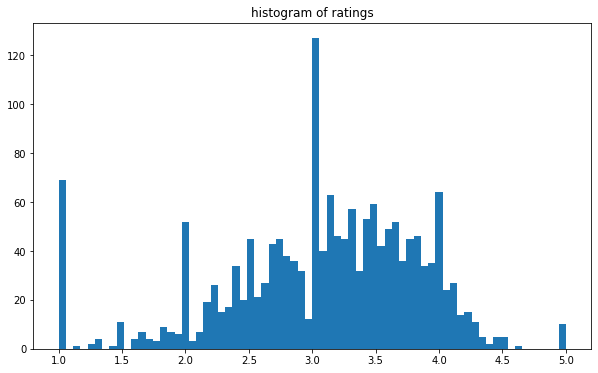

In [10]:
plt.figure(figsize = (10, 6))
plt.title('histogram of ratings')
plt.hist(rating['rating'], bins = 70)

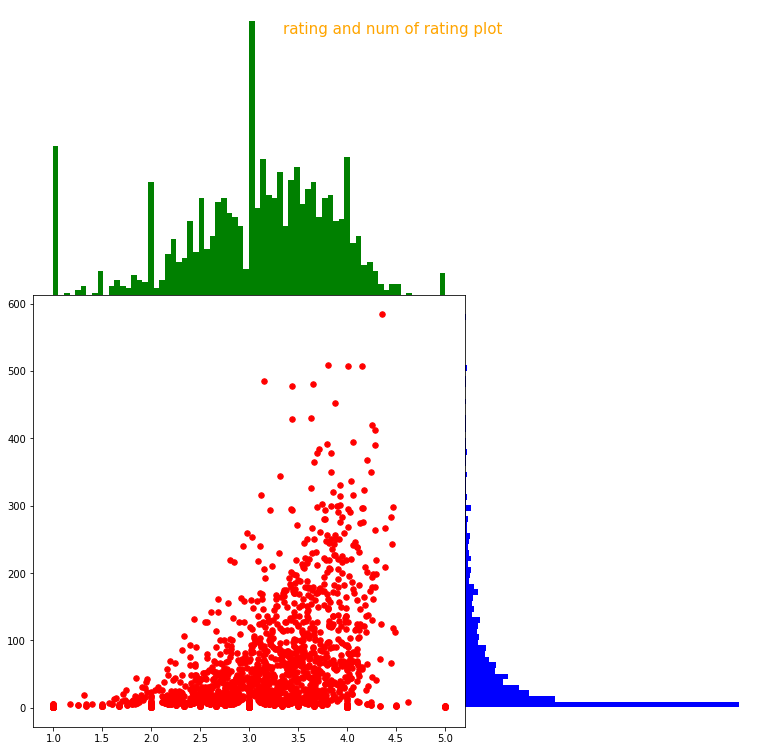

In [11]:
fig = plt.figure(figsize = (10, 10))
fig.suptitle('rating and num of rating plot', fontsize = 15, color = 'orange')

axs1 = fig.add_axes([0, 0.6, 0.6, 0.4])
axs2 = fig.add_axes([0.6, 0, 0.4, 0.6])
axs3 = fig.add_axes([0, 0, 0.6, 0.6])

axs1.axis(False)
axs2.axis(False)

axs1.hist(rating['rating'], bins = 70, color = 'green')
axs2.hist(rating['num of rating'], bins = 70, orientation = 'horizontal', color = 'blue')
axs3.scatter(rating['rating'], rating['num of rating'], s = 30, color = 'red')

In [39]:
moviemat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
rating.sort_values('num of rating', ascending = False).head(10)

,rating,num of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [47]:
starwars_rating = moviemat['Star Wars (1977)']
starwars_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [51]:
similar_to_starwars = moviemat.corrwith(starwars_rating)

In [52]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['correlation'])
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [53]:
corr_starwars.sort_values('correlation', ascending = False).head()

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [54]:
corr_starwars = corr_starwars.join(rating['num of rating'])
corr_starwars.head()

,correlation,num of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [57]:
corr_starwars[corr_starwars['num of rating'] > 100].sort_values('correlation', ascending = False).head(20)

,correlation,num of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
